In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df= df.drop("Serial No.", axis = 1)

In [122]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [124]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [125]:
df["TOEFL Score"].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

<Axes: xlabel='TOEFL Score', ylabel='GRE Score'>

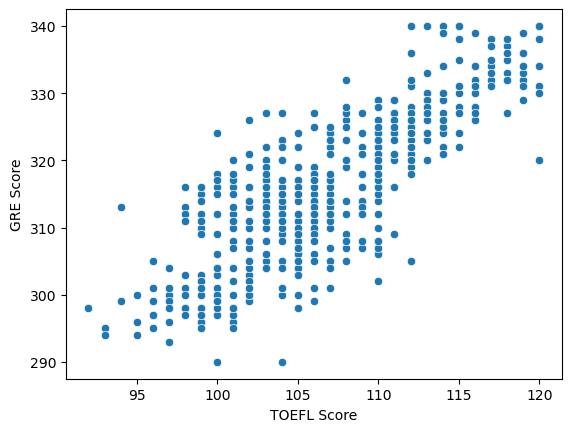

In [126]:
sns.scatterplot(x = df["TOEFL Score"], y = df["GRE Score"])

In [127]:
X = df.drop(["Chance of Admit "], axis = 1)
y = df["Chance of Admit "]

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 15)

In [130]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
regressor = DecisionTreeRegressor(criterion="squared_error", splitter= "best", max_depth = 2)

In [136]:
regressor.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [137]:
y_predict = regressor.predict(X_test_scaled)

In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [139]:
print("Accuracy score : ", r2_score(y_test, y_predict))
print("MAE : ", mean_absolute_error(y_test, y_predict))
print("MSE :", mean_squared_error(y_test, y_predict))

Accuracy score :  0.6729946101957318
MAE :  0.0614726603152313
MSE : 0.006246448235897402


In [140]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'CGPA <= 0.117\nsquared_error = 0.02\nsamples = 350\nvalue = 0.716'),
 Text(0.25, 0.5, 'CGPA <= -0.841\nsquared_error = 0.011\nsamples = 190\nvalue = 0.62'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.009\nsamples = 78\nvalue = 0.544'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.005\nsamples = 112\nvalue = 0.672'),
 Text(0.75, 0.5, 'CGPA <= 0.993\nsquared_error = 0.007\nsamples = 160\nvalue = 0.831'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.003\nsamples = 102\nvalue = 0.782'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 58\nvalue = 0.919')]

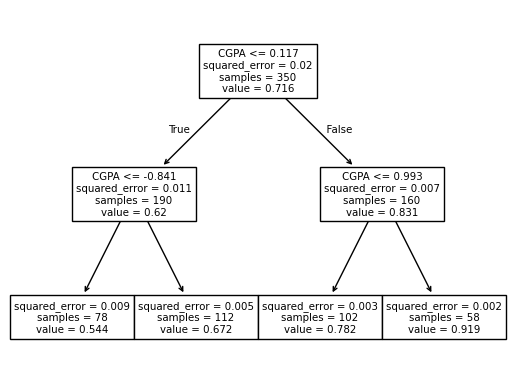

In [141]:
tree.plot_tree(regressor.fit(X_train_scaled, y_train), feature_names= df.columns)

# HYPERPARAMETER TUNING

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error"],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, None],
    "max_features" : ["sqrt", "log2", None]
}

grid = GridSearchCV(estimator=DecisionTreeRegressor(), 
                    param_grid=param, 
                    cv=5, 
                    scoring="r2")

grid.fit(X_train_scaled, y_train)

print("En iyi parametreler:", grid.best_params_)
print("En iyi skor (R2):", grid.best_score_)

En iyi parametreler: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'splitter': 'random'}
En iyi skor (R2): 0.7881185098382975


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [147]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: xlabel='TOEFL Score', ylabel='University Rating'>

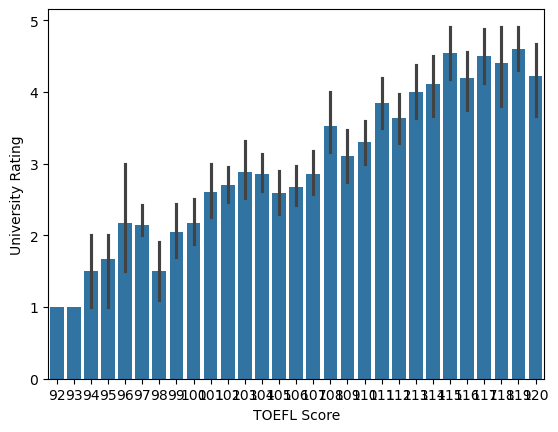

In [148]:
sns.barplot(x = df["TOEFL Score"], y = df["University Rating"])

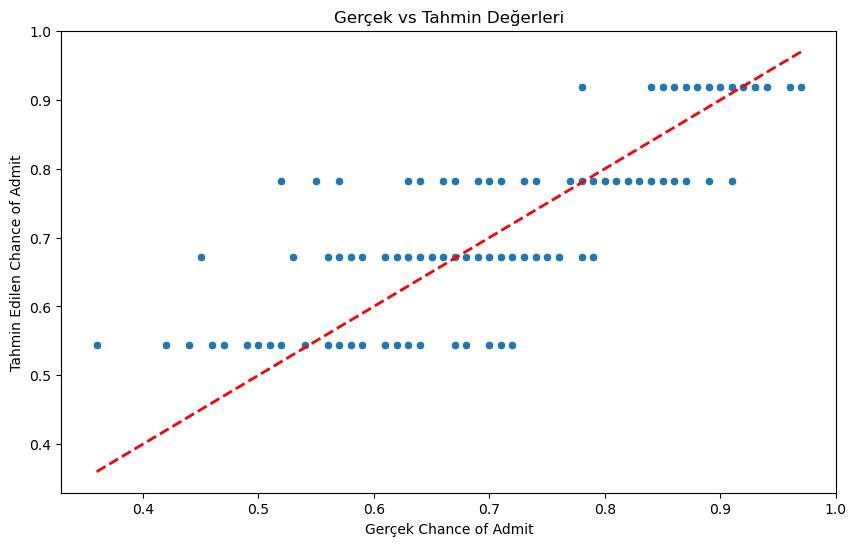

In [149]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Chance of Admit')
plt.ylabel('Tahmin Edilen Chance of Admit')
plt.title('Gerçek vs Tahmin Değerleri')
plt.show()

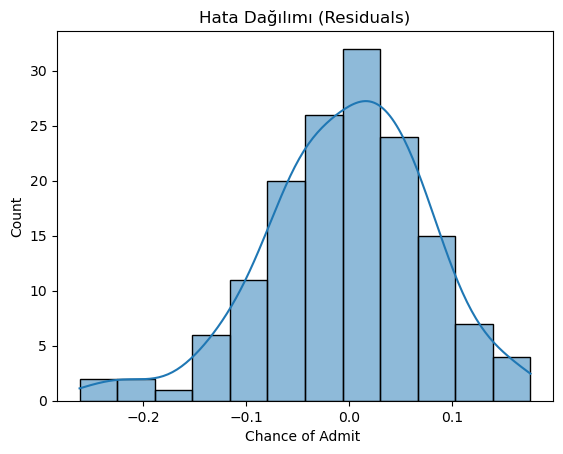

In [150]:
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.title('Hata Dağılımı (Residuals)')
plt.show()